In [4]:
datadir = "data/"
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
beauty = pd.read_csv(datadir + 'beauty.csv', sep=';')

In [13]:
beauty.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [12]:
beauty

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [14]:
beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


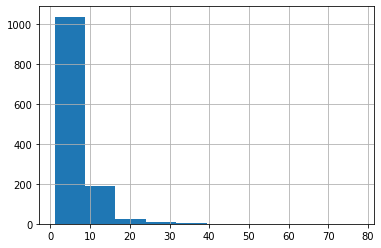

In [16]:
beauty.wage.hist();

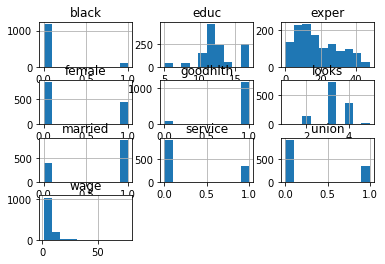

In [19]:
#plt.figure(figsize=(20, 20));
beauty.hist();

In [20]:
beauty.female.value_counts()

0    824
1    436
Name: female, dtype: int64

In [22]:
beauty.looks.value_counts()

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [25]:
beauty.goodhlth.value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

### iloc

In [28]:
female_married_matrix = beauty.iloc[:8, 5 : 7]

In [29]:
female_married_matrix

,female,married
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1
5,1,1
6,0,1
7,0,0


In [31]:
toy_df = pd.DataFrame({"age": [17, 32, 56],
                       "wage": [44, 56, 84]},
                      index = ["Kate", "Leo", "Max"])

In [34]:
toy_df

,age,wage
Kate,17,44
Leo,32,56
Max,56,84


In [35]:
toy_df.iloc[2,1]

84

### loc

In [36]:
toy_df.loc[["Max", "Kate"], "wage"]

Max     84
Kate    44
Name: wage, dtype: int64

### boolean indexing

In [47]:
beauty[(beauty["wage"] > 10) & (beauty["wage"] < 30) & (beauty["female"] == 1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3


### apply

In [48]:
def gender_as_string(gender):
    return "Female" if gender == 1 else "Male"

In [50]:
beauty.female.apply(gender_as_string).value_counts()

Male      824
Female    436
Name: female, dtype: int64

### with lambda

In [51]:
beauty.female.apply(lambda gender : "Female" if gender == 1 else "Male").value_counts()

Male      824
Female    436
Name: female, dtype: int64

### with map

In [52]:
beauty.female.map({ 0 : "Male", 1 : "Female"}).value_counts()

Male      824
Female    436
Name: female, dtype: int64

### groupby

In [57]:
beauty.loc[beauty['female'] == 0, 'wage'].median()

6.41

In [65]:
for(gender, sub_df) in beauty.groupby("female"):
    print("Men" if gender == 0 else "Women", "df shape:", sub_df.shape)
    print("Median wages for {} are: {}". format("Men" if gender == 0 else "Women",
                                               sub_df.wage.median()))

Men df shape: (824, 10)
Median wages for Men are: 6.41
Women df shape: (436, 10)
Median wages for Women are: 3.75


In [66]:
beauty.groupby("female").wage.median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [67]:
beauty.groupby(["female", "married"]).wage.median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

### crosstab

In [68]:
pd.crosstab(beauty.female, beauty.married)

married,0,1
female,,
0,166,658
1,223,213


### plot via seaborn

In [72]:
beauty.educ.value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

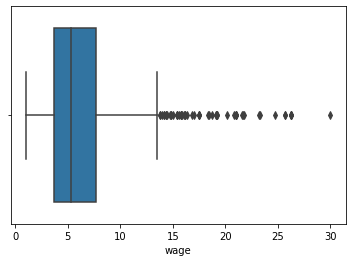

In [73]:
sns.boxplot(x = "wage", data = beauty[beauty.wage < 30]);

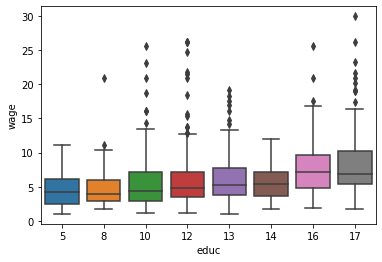

In [75]:
# boxplot educ vs wage
sns.boxplot(x = "educ", y = "wage", data = beauty[beauty.wage < 30]);

### finish up lecture by reviewing topic1_pandas_data_analysis in topic01_pandas_data_analysis